# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [62]:
import pandas as pd
import numpy as np

more_monsters = pd.read_csv("aidedd_blocks2.csv")

<h1 style="background-color:SlateBlue;text-align:center">Missing Data</h1>

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

**Findings:**

59 Attributes and 3 actions are missing

Many of these are either based on more NPC-like characters where the DM would be in charge of setting spells or they are not part of the OGL at this time, so they are not part of the initial data set.  As I look into these, there is a lot of variety, so I am not going to worry about these monsters since there are still 700 to choose from

- Monster Manual SRD: The Systems Reference Document (SRD) contains guidelines for publishing content under the Open-Gaming License (OGL). The Dungeon Masters Guild also provides self-publishing opportunities for individuals and groups.

- Monster Manual BR: Sources - Basic Rules - BR Images - D&D Beyond.



###  More Monsters Table Notes



In [63]:
more_monsters.shape

(762, 53)

In [64]:
# more_monsters.head(20)

In [65]:
# more_monsters.describe()

In [66]:
# more_monsters.info()

In [95]:
# more_monsters.isna().sum()

In [87]:
clean_monsters = more_monsters.dropna(subset=["attributes"])

In [88]:
clean_monsters.shape

(703, 53)

In [91]:
clean_monsters = clean_monsters.dropna(subset=['actions'])

In [92]:
clean_monsters.shape

(700, 53)

In [96]:
# clean_monsters.isna().sum()

In [97]:
clean_monsters.columns

Index(['name', 'size', 'type', 'alignment', 'languages', 'ac', 'hp', 'cr',
       'speed', 'swim', 'fly', 'climb', 'burrow', 'passive_perception',
       'darkvision', 'truesight', 'tremorsense', 'blindsight', 'strength',
       'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'intel', 'int_mod',
       'wis', 'wis_mod', 'cha', 'cha_mod', 'str_save', 'dex_save', 'con_save',
       'int_save', 'wis_save', 'cha_save', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation', 'senses', 'attributes',
       'actions', 'legendary_actions', 'legendary', 'source'],
      dtype='object')

<AxesSubplot:ylabel='cr'>

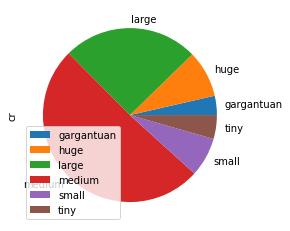

In [99]:
# dt = clean_monsters.groupby("size").count()
# dt.plot.pie(y="cr")

<AxesSubplot:ylabel='cr'>

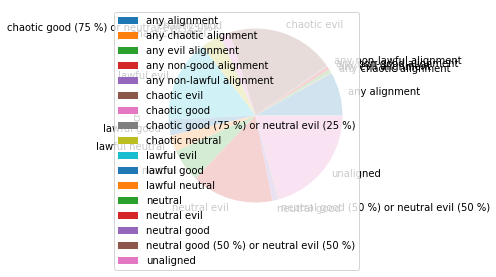

In [101]:
# dt = clean_monsters.groupby("alignment").count()
# dt.plot.pie(y="cr")

<AxesSubplot:ylabel='cr'>

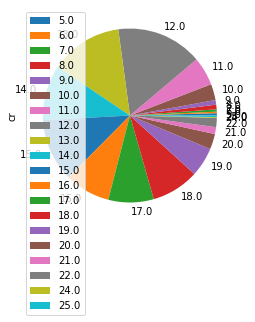

In [103]:
dt = clean_monsters.groupby("ac").count()
dt.plot.pie(y="cr")

<AxesSubplot:xlabel='cr', ylabel='hp'>

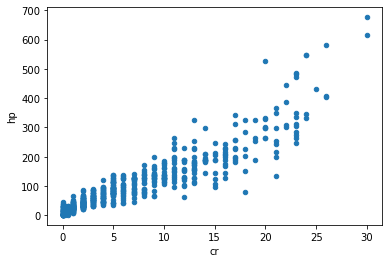

In [119]:
clean_monsters.plot.scatter(x="cr", y="hp")

In [113]:
# hp_check = clean_monsters.loc[clean_monsters["hp"] > 500 ]
# print(hp_check)

<AxesSubplot:xlabel='cr', ylabel='speed'>

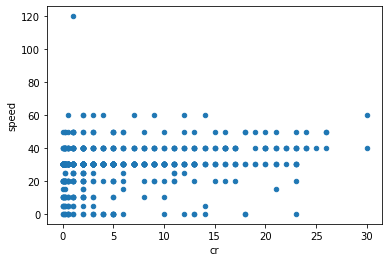

In [114]:
clean_monsters.plot.scatter(x="cr", y="speed")

In [118]:
# speed_check=clean_monsters.loc[clean_monsters["speed"] >100]
# print(speed_check)
# speed_check=clean_monsters.loc[clean_monsters["cr"] >25]
# print(speed_check)

<AxesSubplot:xlabel='cr', ylabel='swim'>

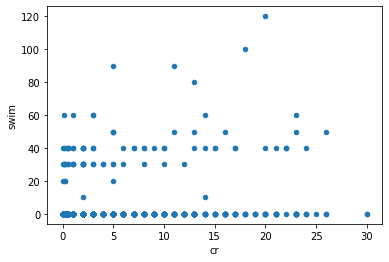

In [120]:
clean_monsters.plot.scatter(x="cr", y="swim")

<AxesSubplot:ylabel='cr'>

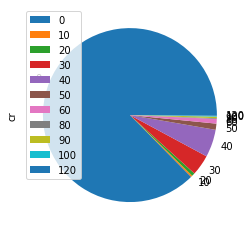

In [121]:
dt = clean_monsters.groupby("swim").count()
dt.plot.pie(y="cr")

In [124]:
# swim_check=clean_monsters.loc[clean_monsters["swim"] > 80]
# print(swim_check)

<AxesSubplot:xlabel='dex', ylabel='cr'>

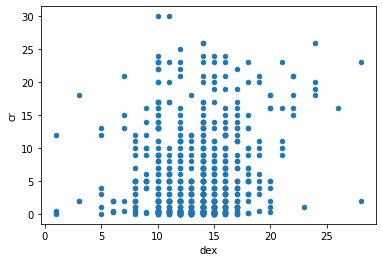

In [131]:
clean_monsters.plot.scatter(x="dex", y="cr")

<h1 style="background-color:SlateBlue;text-align:center">Irregular Data</h1>

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

- [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)


<h1 style="background-color:SlateBlue;text-align:center">Unnecessary Data</h1>

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

I am going to drop the attributes and actions, I am more curious about the stats right now.

<h1 style="background-color:SlateBlue;text-align:center">Inconsistent Data</h1>

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?